### Feature Matching

Done even if the pictures have differences in one or more of the following aspects:
- Scaling
- Angle
- Spacial position
- Capturing devices

Steps:
- **Key Points Detection**

  Salient object detection is a task based on a visual attention mechanism, in which algorithms aim to explore objects or regions more attentive than the surrounding areas on the scene or images.

  Extract some key points and features of interest/ descriptors.
  Features such as,
  - Point/ Patch
  - Edge/ Curve
  - Region

  An image has,
  - Center
  - Shape
  - Texture
  - Position

- **Harris Corner Detection**

  Corners are invariant to translation, rotation, and illumination. A corner is the junction of two edges, where an edge is a sudden change in image brightness

  Disadvantages: 
    
  -  Need to set a different threshold for each image in order to detect the most important interesting points. If a low threshold value is used, a large amount of points are detected together with noisy data from the image

  - Corners are not invariant to scale, for example a large scaled image, the corner is lost.
  *For example:* A zoomed out face.

  - Use a fixed size kernel to detect corners on images, when image scaled, this kernel might become too small or too big which is inconvinient.

That is where more robust methods like $SIFT, SURF, ORB$ come in.

- **SIFT : Scale-Invariant Feature Transform**

  - Difference of Gaussians (DoG)
  
    Apply DoG on differently scaled by downscaling and upscaling versions of the same image. 

    Then we look for features prominant across all of them and select the common ones using a clustering algorith or some such.
    
  - It uses the neighboring pixel gradients to find and refine key points and corresponding descriptors.


- **ORB**

Uses a single scale of images.
**>** Is another feature detector. Read about it.

In [0]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

In [0]:
# Import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
!ls 'drive/My Drive/Feature Matching/'

62.png	box_in_scene.png  box.png


In [0]:
image1=cv2.imread('drive/My Drive/Feature Matching/box.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('drive/My Drive/Feature Matching/box_in_scene.png',cv2.IMREAD_GRAYSCALE)

In [0]:
# Initiate ORB detector
orb = cv2.ORB_create()
# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image1, None)
kp2, des2 = orb.detectAndCompute(image2, None)

In [0]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)

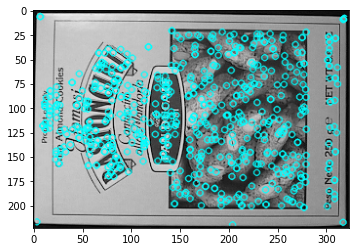

In [118]:
plt.imshow(cv2.drawKeypoints(image1, kp1, None, color=(0, 255, 255)))

***Excercise***

Extract a 3x3 window around the center pixel of (15, 15). 

This is known as the intensity descriptor of size 3x3 for the key point (15, 15) in the image!

A descriptor has the information about the pixel where the feature is present.

The key points are not selected randomly. When a feature such as corners of other dicriminated features are searched for and thrier locations are called keypoints.

**>** Am confused a little, read more about this.

[196 195 198 196 196 199 197 196 198]
(3, 3)


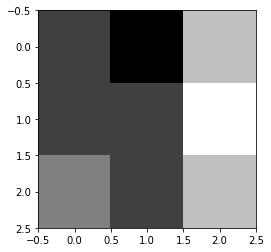

In [36]:
pixel = (15,15)
size = 3
startR = pixel[0] - (int)(size/2)
endR = pixel[0] + (int)(size/2) + 1
startC = pixel[1] - (int)(size/2)
endC = pixel[1] + (int)(size/2) + 1
vector = image1[startR:endR, startC:endC]
plt.imshow(vector, cmap = "gray")
print(vector.flatten())
print(vector.shape)

Text(0.5, 0, 'Box In Scene')

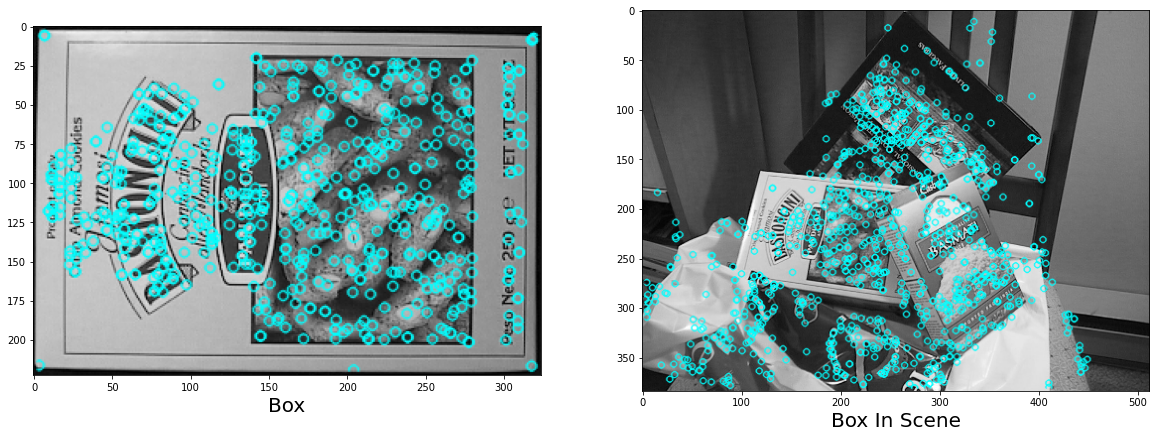

In [58]:
# Display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1, kp1, None, color=(0, 255, 255)))
ax1.set_xlabel("Box", fontsize=20)
ax2.imshow(cv2.drawKeypoints(image2, kp2, None, color=(0, 255, 255)))
ax2.set_xlabel("Box In Scene", fontsize=20)

### Brute Force Matcher

We can compare feature descriptors and find the correspondance between them.

Using **KNN** algorithm here:
  - For any pixel location we now find the k = 2 most near points in the other image.

Then the code sets a threshold of how much distance should be taken.

603
72


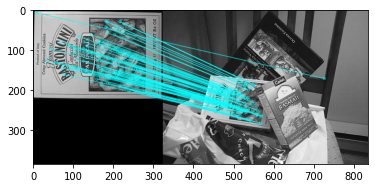

In [74]:
match = cv2.BFMatcher()
# Hyperparameter is 2 here
matches = match.knnMatch(des1, des2, k=2)
print(len(matches))
# Distance threshold is set as 0.7 and filtering is done based on it here
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0, 255, 255),
                  singlePointColor=None,
                  flags=2)
print(len(good))
img3 = cv2.drawMatches(image1, kp1, image2, kp2, good, None, **draw_params)
plt.imshow(img3)

# Panorama

Feature detection is always done in greyscale so as to get information about the region only, because the colour changes based on illumination.

Morning vesus evening of Taj Mahal would give you different colours.

In [0]:
image1=cv2.imread('drive/My Drive/Panorama/Eg1/img2_2.png')
image2=cv2.imread('drive/My Drive/Panorama/Eg1/img2_1.png')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [0]:
# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image1_gray, None)
kp2, des2 = orb.detectAndCompute(image2_gray, None)

In [0]:
# Initiate Sift detector
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray, None)
kp2, des2 = sift.detectAndCompute(image2_gray, None)

Text(0.5, 0, 'Right Taj')

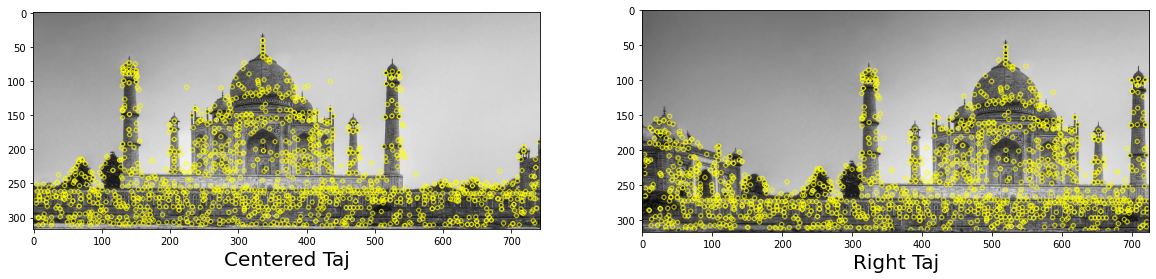

In [93]:
# Display the keypoints and features detected on both images
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1_gray, kp1, None, color=(255,255,0)))
ax1.set_xlabel("Centered Taj", fontsize=20) 
ax2.imshow(cv2.drawKeypoints(image2_gray, kp2, None, color=(255,255,0)))
ax2.set_xlabel("Right Taj", fontsize=20)

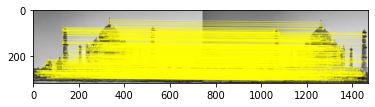

In [104]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)

draw_params = dict(matchColor=(255, 255,0),
                   singlePointColor=None,
                   flags=2)

img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
plt.imshow(img3)

In [0]:
# Homography

# Now there is no use of descriptors anymore
# If getting 10 good points then do homography else not enough mathches
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    # queryIdx and trainIdx are indices of the dictionaries
    # The pixel locations of keypoints are extracted from the dictionary format
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    # RANSAC Algorithm to get Homography matrix
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0], [0,h-1], [w-1,h-1], [w-1,0]]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    # img2 = cv2.polylines(image2,[np.int32(dst)], True, 255,3, cv2.LINE_AA)

    # plt.imshow(img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

Warps the right image so its matching keypoints are in the same position as that of the left image, then places the left image on top in it's position, that is stiching.

**Reprojection Error**

The measure of how much the chosen destination points supplied differ from the correspoding out put point after applying the H matrix.

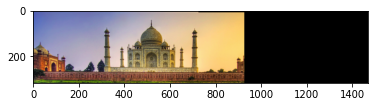

In [96]:
dst = cv2.warpPerspective(image1, M, (image2.shape[1] + image1.shape[1], image2.shape[0]))
dst[0:image2.shape[0],0:image2.shape[1]] = image2
plt.imshow(dst)



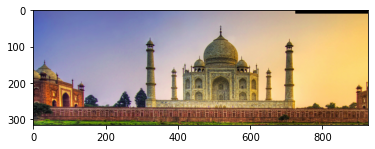

In [105]:
# Getting rid of the black
def trim(frame):
    # Crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    # Crop bottom
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    # Crop left
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    # Crop right
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame

plt.imshow(trim(dst))
#cv2.imsave("original_image_stitched_crop.jpg", trim(dst))

### Panorama Multiple Images

- A large overlapping image is needed, else will not work. For example in the third case.  
- Good illuminations is required for clear intensity values and less noise.

In [0]:
def trim(frame):
          #crop top
          if not np.sum(frame[0]):
              return trim(frame[1:])
          #crop bottom
          if not np.sum(frame[-1]):
              return trim(frame[:-2])
          #crop left
          if not np.sum(frame[:,0]):
              return trim(frame[:,1:])
          #crop right
          if not np.sum(frame[:,-1]):
              return trim(frame[:,:-2])
          return frame

def panorama(path_right,path_left):

      image1=cv2.imread(path_right)
      image2=cv2.imread(path_left)

      image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
      image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

      image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
      image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

      # Initiate Sift detector
      sift =cv2.xfeatures2d.SIFT_create()
      kp1, des1 = sift.detectAndCompute(image1_gray,None)
      kp2, des2 = sift.detectAndCompute(image2_gray,None)

      # display the keypoints and features detected on both images
      #fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
      #ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
      #ax1.set_xlabel("(a)", fontsize=14)
      #ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
      #ax2.set_xlabel("(b)", fontsize=14)

      match = cv2.BFMatcher()
      matches = match.knnMatch(des1,des2,k=2)

      good = []
      for m,n in matches:
          if m.distance < 0.7*n.distance:
              good.append(m)

      draw_params = dict(matchColor=(0,255,0),
                            singlePointColor=None,
                            flags=2)

      img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
      #plt.imshow(img3)

      MIN_MATCH_COUNT = 10
      if len(good) > MIN_MATCH_COUNT:
          src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
          dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

          M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

          h,w = image2_gray.shape
          pts = np.float32([ [0, 0],[0, h-1],[w-1, h-1],[w-1, 0] ]).reshape(-1,1,2)
          dst = cv2.perspectiveTransform(pts, M)
          #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

          #plt.imshow(img2)
      else:
          print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

      dst = cv2.warpPerspective(image1, M, (image2.shape[1] + image1.shape[1], image2.shape[0]+ image1.shape[0]))
      dst[0:image2.shape[0],0:image2.shape[1]] = image2
      #plt.imshow(dst)

      
      #plt.imshow(trim(dst))
      #cv2.imsave("original_image_stitched_crop.jpg", trim(dst))
      return(trim(dst))

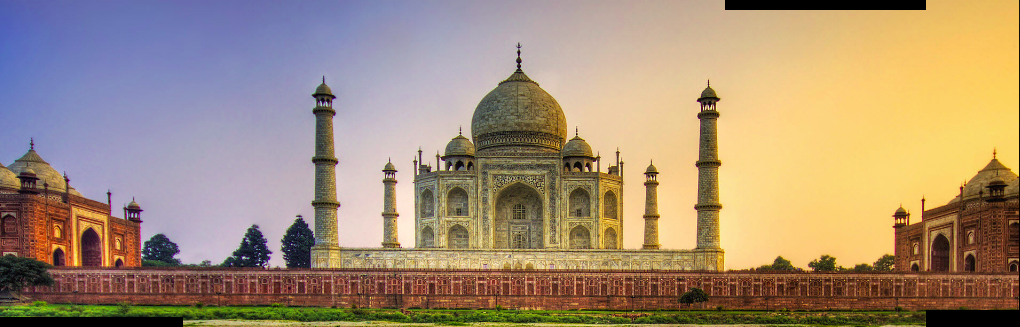

In [145]:
root='drive/My Drive/Panorama/Eg1/'
images=os.listdir(root)
save_path='drive/My Drive/Panorama/Outputs/Eg1/'
for i in range (len(images)-1):
  path_right=root + images[i+1] 
  if i==0:
    path_left=root +images[i]
  else:
    path_left=save_image
  img_new = panorama(path_right, path_left)
  save_image = save_path + images[i+1][:-4] + "output.png"

cv2_imshow(cv2.cvtColor(img_new, cv2.COLOR_RGB2BGR)) 

### Playing With Photos I Took

In [0]:
# Finish This